We use a density distribution that drops off as $r^{-2}$, following a power law profile. This relationship is more common in density structure created by a Type II presupernova mass-loss.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as unt
import scipy.integrate as integrate
from matplotlib import rc, rcParams

In [89]:
# Setting up the radius from the center of the explosion.

pos_x = np.linspace(2.2546e-5, 1.5, 1000)*unt.pc
pos_x = pos_x.to(unt.cm).value
pos_y = np.linspace(2.2546e-5, 1.5, 1000)*unt.pc
pos_y = pos_y.to(unt.cm).value
pos_z = np.linspace(2.2546e-5, 1.5, 1000)*unt.pc
pos_z = pos_z.to(unt.cm).value

def radius(a, b, c):
    r = np.sqrt(a**2 + b**2 + c**2)
    return r

rad = radius(pos_x, pos_y, pos_z) # cm


density of the circumstellar medium is given by
\begin{equation}
\rho_{cs} = \frac{\dot{M}}{4\pi u_w r^2}
\end{equation}

In [90]:
dM = 6e-5 #Msol/yr
dM = 5.6658e21 #g/s

u_w = 10*(unt.km/unt.s) #km/s
u_w = u_w.to(unt.cm/unt.s).value #cm/s

den = dM/(4*np.pi*u_w*rad**2) #g/cm^3


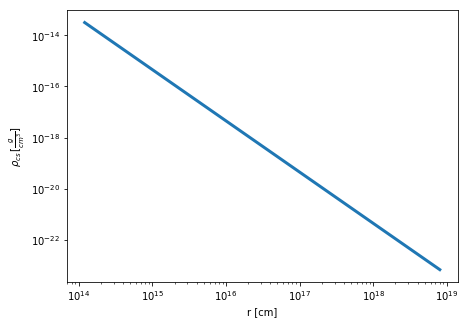

In [91]:
fig, ax = plt.subplots(1, figsize=(7, 5))
ax.plot(rad, den, '-', lw=3)
ax.set_xlabel(r'r [cm]')
ax.set_ylabel(r'$\rho_{cs} \, [\frac{g}{cm^3}]$')
ax.ticklabel_format(style='sci', scilimits=(0.0, 0.0), axis='y')
ax.set_xscale('log')
ax.set_yscale('log')

For the specific self-similar case we consider, $n=12$ and $s=2$ and we set $\gamma=2$. Thus $m =(n-3)/(n-s)$. These parameters can be adjusted based on the observation dependent parameters to have a self-consistent solution reflecting the fitting of the observed light curves.

A solid angle (symbol: $\Omega$) is a measure of the amount of the field of view from some particular point that a given object covers. That is, it is a measure of how large the object appears to an observer looking from that point. The point from which the object is viewed is called the apex of the solid angle, and the object is said to subtend its solid angle from that point. An object's solid angle in steradians is equal to the area of the segment of a unit sphere, centered at the apex, that the object covers.

**"You take a surface. Then you project it onto a unit sphere (a sphere of radius 1). Then you calculate the surface area
of your projection. That’s it"**

A solid angle in steradians is the following ratio $\Omega = \frac{A}{r^2}$, where $A$ is the spherical surface area and $r$ is the radius of the considered sphere with the surface area of a sphere being $A = 4\pi r^2$. Thus, the solid angle of a sphere measured from any point in its interior is $4\pi \, \mbox{sr}$. In spherical coordinates there is a formula for the differential, 
$$d\Omega = \sin{\theta} \, d\theta \, d\phi$$

Solid angle ($\Omega$) is a two dimensional angle in 3-D space & it is given by the surface (double) integral as follows:

$$\Omega = \frac{A}{r^2} = \frac{ \int \int_S r^2 \sin(\theta) d\theta d\phi}{r^2} = \int \int_S \sin\theta d\theta d\phi$$

Now, applying the limits, $\theta$=
angle of longitude and $\phi$= angle of colatitude and integrating over the entire surface of a sphere, we get

$$\Omega = \int^{2\pi}_0 d\phi \int^\pi_0 \sin\theta d\theta$$

$$\Omega = \int^{2\pi}_0 d\phi[−cos\theta]^{\pi}_0 = 2\int^{2\pi}_0 d\phi = 2[\phi]^{2}_0 = 2 [2\pi]=4\pi$$

where $S$ denotes an integral over the surface (the projection of your object onto
the sphere).

![alt text](solid.png "Any area on a sphere which is equal in area to the square of its radius, when observed from its center, subtends precisely one steradian.")

The solid angle of a cone with its apex at the apex of the solid angle, and with apex angle $2\Theta$, is the area of a spherical cap on a unit sphere. Let’s say the angle, $\Theta$ (angle at which the cone opens) is fixed, since the cone doesn’t change. As it happens, this is also the colatitude $\phi$, so we can integrate $\phi$ from 0 to $\Theta$. If the circle projected by the cone lies perfectly on a line of latitude, this makes our calculation much easier, since that means we can integrate longitude $\theta$ from $0$ to $2\pi$. By computing the following double integral using the unit surface element in spherical coordinates,

\begin{equation}
\Omega = \int^{2\pi}_0  \int^\Theta_0 \sin{\phi} d\theta d\phi = \int^{2\pi}_0 d\theta \int^\Theta_0 \sin{\phi} d\phi = 2\pi\left[-\cos{\theta} \right]^{\Theta}_0 = 2\pi(1 - \cos{\Theta})
\end{equation}

![alt text](cone.png "Section of cone (1) and spherical cap (2) inside a sphere. ")

In [92]:
# All the observation dependent parameters ofSN 1993J

alpha = -0.81
beta = -0.73
delta = -1.88
m = -delta/3

gamma = 1 - 2*alpha



\begin{equation}
   \tau_{\nu} \propto \left( \frac{\dot{M}}{u_w}  \right)^{5-3m} t^{\delta} \nu^{-2.1}
\end{equation}

\begin{equation}
 S(\nu) \propto \int \nu^{\alpha}t^{\beta} \left(\frac{\dot{M}}{u_w} \right)^{\eta}e^{-\tau_{\nu}}d\Omega,
\end{equation}

$\alpha = (1-\gamma)/2$

$\beta = -(\gamma+5-6m)/2$

$\eta = (\gamma-7+12m)/4$

$\delta = -3m$

In [184]:
time = np.linspace(2, 1000, 1000)*unt.day #days
time = time.to(unt.s).value

#theta = np.linspace(0, 2*np.pi, 1000)
phi = np.linspace(0, 0.00203622, 1000)

#freq = [1.4, 4.9, 8.3, 14, 23] #GHz
f = 23*unt.GHz
f = f.to(unt.Hz).value

eta = (gamma - 7 + 12*m) / 4
#b = -(gamma - 5 + 6*m) / 2
#a = (1 - gamma) / 2


In [185]:
# Calculating the optical depth from the emission of the shocked material.
def int_optical_depth(t, mu):
    
    OPTICAL_DEPTH = (mu**(-2.1)) * (t**delta) * (den)**(5+delta)

    return(OPTICAL_DEPTH)


# Calculating the radio flux density from the emission of the shocked material.
def int_flux_density(t, mu, tau, p):

    #FLUX_DENSITY = (mu**alpha) * (t**beta) * (den)**eta * np.exp(-tau)
    #FLUX_DENSITY = (mu**alpha) * (t**beta) * (den)**eta * np.exp(-tau) * (2*np.pi*(1-np.cos(0.00203622)))
    FLUX_DENSITY = (mu**alpha) * (t**beta) * (den)**eta * np.exp(-tau) * (2*np.pi*(1-np.cos(p)))
    
    return(FLUX_DENSITY)




The synchrotron spectrum of a single electron has a logarithmic slope of 1/3 at low frequencies, a broad peak near the critical frequency $\nu$ max, and falls off sharply at higher frequencies.

\begin{equation}
1 \mbox{Jy} = 10^{-23} \frac{\mbox{erg}}{\mbox{s} \, \mbox{cm}^2 \mbox{Hz}}
\end{equation}


\begin{equation}
1 \mbox{day} = 86400 \, \mbox{sec}
\end{equation}


In [186]:
opt_sum = int_optical_depth(time, f)
flux_sum = int_flux_density(time, f, opt_sum, phi)

# intergrating over the entire solid angle and time
S_v = integrate.cumtrapz(flux_sum, phi, initial=0)

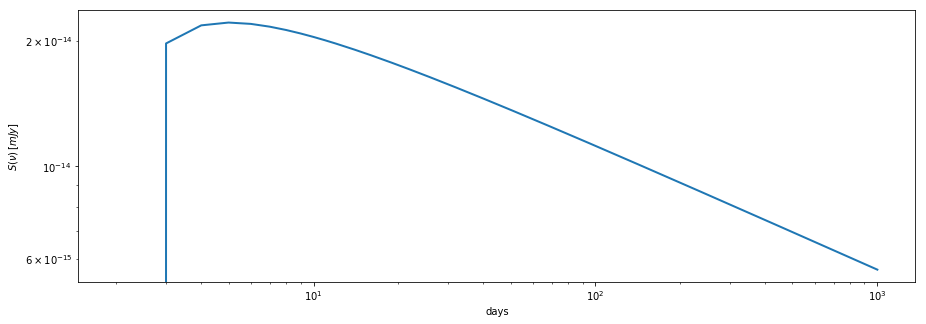

In [195]:
fig, ax = plt.subplots(1, figsize=(15, 5))
#ax.plot(np.log10(time/86400), np.log10(S_v*(10**(23)), '-')
#ax.legend(freq, loc=1)
#plt.loglog((time/86400), S_v*(10**(23)), '-')
#plt.plot((time/86400), flux_sum*(1e23),'-', S_v*(1e23), '--', lw=2)
plt.plot((time/86400), flux_sum*(1e23),'-', lw=2)
ax.set_xlabel("days")
ax.set_ylabel(r"$S(\nu) \, [mJy]$")
ax.set_xscale('log')
ax.set_yscale('log')
#plt.savefig("light_curve.png")


NameError: name 'freq' is not defined

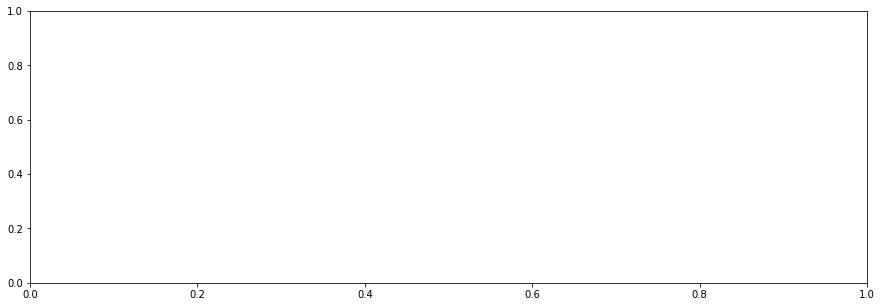

In [148]:
fig, ax = plt.subplots(1, figsize=(15, 5))

for f in freq:
    opt_sum = int_optical_depth(time, f)
    tau_v = integrate.cumtrapz(opt_sum, time, initial=0)
    
    flux_sum = int_flux_density(time, f, tau_v)
    S_v = integrate.cumtrapz(flux_sum, time, initial=0)
    
    ax.plot(time, S_v)
    ax.legend(freq, loc=1)
ax.set_xlabel("days")
ax.set_ylabel(r"$S(\nu) [mJy]$")
plt.savefig("light_curve.png")


In [11]:
K1 = 4.14e3
apl= -0.99
bet = -0.64
K2 = 1.35e3
delt = -0.99

Text(21.2,0.5,'$S(\\nu) [mJy]$')

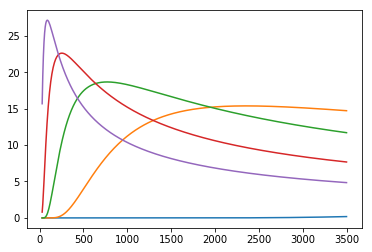

In [14]:
fq = [1.4, 4.9, 8.3, 14, 23] #GHz
for f in fq:
    
    T = K2 * (f/5)**(-2.1) * (time/86400)**delt
    S = K1 * (f/5)**apl * (time/86400)**bet * np.exp(-T)
    plt.plot(time/86400, S)

    ax.plot(time, S_v)
    ax.legend(fq, loc=1)
ax.set_xlabel("days")
ax.set_ylabel(r"$S(\nu) [mJy]$")
#plt.savefig("light_curve.png")


